## Explore The Execution Envrionment

Author: Lei Wang
Date: May 22th

We could use jupyter as an interface to communicate with remote machine by executing shell commands. Check $PROJECT_ROOT/Readme.md defined below to see how we preapre our executing envrionment.

In AIStudio, your content could be persistent in mount drivers:

```shell
# mount external stroage 
/home/aistudio/work/
```

You can also mount dataset into temporary folder

```shell
# mount datasets
/home/aistudio/data
```

Mask_RCNN from paddlepaddle models is well developed for people detection. In the code we limit our detection only to 'people' and output detection results as a video.


As a contrast with the popular Mask_RCNN implementation by tensorflow, We use an official paddlepaddle implementation from paddlepaddle [model zoo](https://github.com/PaddlePaddle/models/tree/develop/PaddleCV/rcnn).


We clone paddlepaddle offcial RCNN implementation into our work space and write python codes to run inference for each frame of an uploaded video.


Examples of using opencv to generate detection results and a video is provided. We also show you how to use FFmpeg to generate video from generated images.

Jupyter also provides us with UI components for further demonstration. Rendering point clouds using Three.js powered by webgl, or adding an HTML5 components to show a media couldn't be simpler.

## Check the virtual machine running on

In [25]:
!echo "check data in connnected device"
!echo "check disk usage ..."
!df -h
!pwd
!cat /etc/os-release
# 255 cores, with 250 GB, the output is too large ...
# !cat /proc/cpuinfo
# !cat /proc/meminfo
import sys
sys.executable

check data in connnected device
check disk usage ...
Filesystem      Size  Used Avail Use% Mounted on
overlay         493G  179G  289G  39% /
tmpfs           126G     0  126G   0% /dev
tmpfs           126G     0  126G   0% /sys/fs/cgroup
/dev/vdd1       3.4T  399G  2.9T  13% /home/aistudio
/dev/vda1        40G   28G   10G  74% /etc/hosts
/dev/vdc1       493G  179G  289G  39% /etc/hostname
shm              64M     0   64M   0% /dev/shm
/home/aistudio
NAME="Ubuntu"
VERSION="16.04.3 LTS (Xenial Xerus)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 16.04.3 LTS"
VERSION_ID="16.04"
HOME_URL="http://www.ubuntu.com/"
SUPPORT_URL="http://help.ubuntu.com/"
BUG_REPORT_URL="http://bugs.launchpad.net/ubuntu/"
VERSION_CODENAME=xenial
UBUNTU_CODENAME=xenial


'/opt/conda/envs/python27-paddle120-env/bin/python'

In [3]:
# 查看个人持久化工作区文件
!ls /home/aistudio/work/

ROOT="/home/aistudio/work"
Project_Root="{}/Github/paddlepaddle".format(ROOT)

print(Project_Root)

# you can also use `&&` or `||` to express conditional execution of expressions in one line.
!if [ ! -d $Project_Root ]; then mkdir -p $Project_Root; fi
!ls 

# This code does not work in AIStudio and you are not able to install git using yum directly.
# !git clone https://github.com/matterport/Mask_RCNN $ROOT/Github/Mask_RCNN
# see https://aistudio.baidu.com/aistudio/projectDetail/56572
# download pygit script
!if [ ! -f simple_git_download.py ]; then wget https://github.com/nemon-/simple_git_download/raw/master/simple_git_download.py; fi

data  Github  local  tmp
/home/aistudio/work/Github/paddlepaddle
60969.ipynb			m4-1.4.10.tar.gz
autoconf-2.69			m4-1.4.13
autoconf-2.69.tar.gz		m4-1.4.13.tar.gz
curl-7.47.1			make-3.81
curl-7.47.1.tar.gz		openssl-1.0.1c
data				openssl-1.0.1c.tar.gz
Data-Dumper-2.173		openssl-1.0.2g
Data-Dumper-2.173.tar.gz	openssl-1.0.2g.tar.gz
expat-2.1.0			perl-5.20.1
expat-2.1.0.tar.gz		perl-5.24.1
ExtUtils-MakeMaker-7.36		perl-5.24.1.tar.gz
ExtUtils-MakeMaker-7.36.tar.gz	simple_git_download.py
git-2.17.0			v2.17.0.tar.gz
homework.mp4			work
index.html			zlib-1.2.11
m4-1.4.10			zlib-1.2.11.tar.gz


In [4]:
!mkdir -p $ROOT/local
!chmod -R 755 $ROOT/local #useful when the notebook reboot
!ls -l $ROOT/local/bin

total 55868
-rwxr-xr-x 1 aistudio 1000    14789 Jun 10 14:30 autoconf
-rwxr-xr-x 1 aistudio 1000     8659 Jun 10 14:30 autoheader
-rwxr-xr-x 1 aistudio 1000    32328 Jun 10 14:30 autom4te
-rwxr-xr-x 1 aistudio 1000    21233 Jun 10 14:30 autoreconf
-rwxr-xr-x 1 aistudio 1000    17269 Jun 10 14:30 autoscan
-rwxr-xr-x 1 aistudio 1000    34040 Jun 10 14:30 autoupdate
-rwxr-xr-x 1 aistudio 1000     4287 Jun 10 14:30 c_rehash
-rwxr-xr-x 1 aistudio 1000   136280 Jun 10 14:30 curl
-rwxr-xr-x 1 aistudio 1000     5375 Jun 10 14:30 curl-config
-rwxr-xr-x 1 aistudio 1000 12460416 Jun 10 14:30 git
-rwxr-xr-x 1 aistudio 1000   162751 Jun 10 14:30 git-cvsserver
-rwxr-xr-x 1 aistudio 1000   351673 Jun 10 14:30 gitk
-rwxr-xr-x 1 aistudio 1000 12460416 Jun 10 14:30 git-receive-pack
-rwxr-xr-x 1 aistudio 1000  7120688 Jun 10 14:30 git-shell
-rwxr-xr-x 1 aistudio 1000 12460416 Jun 10 14:30 git-upload-archive
-rwxr-xr-x 1 aistudio 1000  7157736 Jun 10 14:30 git-upload-pack
-rwxr-xr-x 1 aistudio 1000     42

In [5]:
%%bash
ROOT="/home/aistudio/work"
Repo="Github/SpatialPerceptron"
if [ ! -d ${ROOT}/${Repo} ]; then
 echo "Making ${ROOT}/${Repo} ..."
 mkdir -p ${ROOT}/${Repo}
 echo "done."
 echo "Generating ${Repo} downloading script ..."
 python2 simple_git_download.py https://github.com/yiakwy/SpatialPerceptron.git ${ROOT}/${Repo} wget
 echo "done."
 echo "Downloading ..."
 bash ${ROOT}/${Repo}/download.sh
 echo "done."
fi

ls ${ROOT}/${Repo} -h


download.sh
notebooks
python
README.md
scripts


## Config Git & Build Essentials

AIStudio does not give the public the open access to the underlying machines and neither provide build-essential tools. To make full use of such virtual machine executor to build a hybrid system (python, c++, flowjs+webgl), or simple sychronoize the project libraries developed in other world to include inside the python trainner programs.

There several ways to build the system from scratch:

- using wget to download related tools to build the software manually into non-system owner directory
- simple_git_download.py (last cell): a content downloader (not equivalent to git client tool) (deprecated already in my build process)
- pygit + pymake: pure python implementation of these tools
	- py-make : does not parse regular make needed to build git client tool
    - other distribtuion : may include a subset of functionalities of standard GUN programes.
    
Hence I decided to build the git in local directories from scratch. Few things to consider to build a git from source.

### Build Essentials

We first build `make` from source. Since we don't have make, we need to build a local weak version of make first and then use that make to distribute our binaries into the build directory.

We will be back to this point once we finished dependencies building.

### Dependencies

- openssl : curl does not link to openssl static library. Hence we need to compile openssl to dynamic libraries. 
- zlib : to compress the submitted patches to remote repositories; curl command also depends on it
- curl : to enable network access 
- expat : to serialize and deserialize the patches
- m4 : we will use autoconf to generate `configure` followed by building autoconf which depends on `m4`

Once we done, we transfer the compiled binaries to persistent libraries and executables in a thrid party folder so that we could reuse them in another project.







In [25]:
%%bash
ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD/bin
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH

ls make-3.81 | grep "build.sh"
cd make-3.81
chmod +x configure
./configure --prefix=$BUILD/
# You may lost control to execute the program when the virtual machine executes the next time.
# build local make
# if [ ! -f make ]; then
sh build.sh
# fi
./make 
./make install
cd ..
# this will install a binary in $BUILD/bin directory

In [26]:
!$ROOT/local/bin/make --version

GNU Make 3.81
Copyright (C) 2006  Free Software Foundation, Inc.
This is free software; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A
PARTICULAR PURPOSE.

This program built for x86_64-unknown-linux-gnu


In [69]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$LD_LIBRARY_PATH

## Building Essentials

### zlip : git use zip to compress patches submitted to remote repositories.
if [ ! -f zlib-1.2.11.tar.gz ]; then
wget https://zlib.net/zlib-1.2.11.tar.gz
fi
tar -xf zlib-1.2.11.tar.gz
cd zlib-1.2.11
./configure --prefix=${BUILD}
make install
cd ..

In [13]:
%%bash

ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH

if [ ! -f openssl-1.0.2g.tar.gz ]; then
wget http://openssl.org/source/openssl-1.0.2g.tar.gz
fi
tar -xf openssl-1.0.2g.tar.gz
cd openssl-1.0.2g
./config shared --prefix=${BUILD}/openssl --openssldir=${BUILD}/openssl/ssl
make clean
make
make install
cd ..

In [51]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export PKG_CONFIG_PATH=${BUILD}/openssl/lib/pkgconfig

# http://www.linuxfromscratch.org/blfs/view/7.9/basicnet/curl.html
export CPPFLAGS="-I${BUILD}/openssl/include/openssl -I${BUILD}/include"
export LDFLAGS="-L${BUILD}/openssl/lib -L${BUILD}/lib"
export LIBS="-lssl -lcrypto"

if [ ! -f curl-7.47.1.tar.gz ]; then
wget https://curl.haxx.se/download/curl-7.47.1.tar.gz
fi
tar -xf curl-7.47.1.tar.gz
cd curl-7.47.1
./configure --prefix=${BUILD} --with-ssl=${BUILD}/openssl --with-libssl-prefix=${BUILD}/openssl/lib
make clean
make
make install
cd ..

In [61]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$LD_LIBRARY_PATH

if [ ! -f expat-2.1.0.tar.gz ]; then
wget http://downloads.sourceforge.net/expat/expat-2.1.0.tar.gz
fi
tar -xf expat-2.1.0.tar.gz
cd expat-2.1.0
./configure --prefix=$BUILD
make
make install
cd ..

In [62]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$LD_LIBRARY_PATH

## Building Essentials

### m4 : autoconf-2.69 depends on m4
if [ ! -f m4-1.4.13.tar.gz ]; then
wget http://ftp.gnu.org/gnu/m4/m4-1.4.13.tar.gz
fi
tar -xf m4-1.4.13.tar.gz
cd m4-1.4.13
./configure --prefix=${BUILD}
make install
cd ..

In [52]:
%%bash
ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$LD_LIBRARY_PATH

ldd $BUILD/lib/libcurl.so.4 # to see whether we have libssl.so linked to the libcurl.so
curl --version

ldd $BUILD/bin/xmlwf
xmlwf --version

m4 --version

	linux-vdso.so.1 =>  (0x00007ffdd1379000)
	libz.so.1 => /home/aistudio/work/local/lib/libz.so.1 (0x00007fefde37f000)
	libssl.so.1.0.0 => /lib/x86_64-linux-gnu/libssl.so.1.0.0 (0x00007fefde116000)
	libcrypto.so.1.0.0 => /lib/x86_64-linux-gnu/libcrypto.so.1.0.0 (0x00007fefddcd2000)
	libc.so.6 => /lib/x86_64-linux-gnu/libc.so.6 (0x00007fefdd908000)
	libdl.so.2 => /lib/x86_64-linux-gnu/libdl.so.2 (0x00007fefdd704000)
	/lib64/ld-linux-x86-64.so.2 (0x00007fefde800000)
curl 7.47.1 (x86_64-pc-linux-gnu) libcurl/7.47.1 OpenSSL/1.0.2g zlib/1.2.11
Protocols: dict file ftp ftps gopher http https imap imaps pop3 pop3s rtsp smb smbs smtp smtps telnet tftp 
Features: IPv6 Largefile NTLM NTLM_WB SSL libz TLS-SRP UnixSockets 
	linux-vdso.so.1 =>  (0x00007fff42f91000)
	libexpat.so.1 => /home/aistudio/work/local/lib/libexpat.so.1 (0x00007f4e93a2a000)
	libc.so.6 => /lib/x86_64-linux-gnu/libc.so.6 (0x00007f4e93660000)
	/lib64/ld-linux-x86-64.so.2 (0x00007f4e93c53000)
m4 (GNU M4) 1.4.13
Copyright (C) 2009 F

usage: xmlwf [-n] [-p] [-r] [-s] [-w] [-x] [-d output-dir] [-e encoding] file ...


## Additional Configuration to build a C make project

Traditional GNU C projects are built from a makefile and it is automatically generated from `configure` script and `Makefile.in`.

Both the `configure` script and the makefile template `Makefile` are themselves made by code generator like autoconf with `configure.ac` micro sets and automake with `Makefile.am` micro sets.

Since make tool is set by autoconf with

> @SET_MAKE@

Simply modifying the `Makefile.in` does not work. A plausible method is to export local searching path into `$PATH` so that a software works as if we are building normally.

We also need to add build essentials manually by adding following libs:

- autoconf
- automake [x]
- libtool [x]

We need to build autoconf. While the system provided perl is absent of some core modules and thus does not work as expected, we need to install perl-5 from scratch.

The newly install perl prepares us with cpanm module with which we could install perl modules used by GNU build system

The following modules should be installed to build autoconf :

```shell
cpanm ExtUtils::MakeMaker
cpanm Data::Dumper
```

Once they are done, we proceed to build git by bypassing customer dependencies.

In [11]:
%%bash
ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$LD_LIBRARY_PATH

PERL_URL="http://www.cpan.org/src/5.0/perl-5.24.1.tar.gz"

if [ ! -f perl-5.24.1.tar.gz ];then
wget http://www.cpan.org/src/5.0/perl-5.24.1.tar.gz
tar -xf perl-5.24.1.tar.gz
chmod +x perl-5.24.1 
fi

cd perl-5.24.1
echo "Configuring the project ..."
# ./Configure -des -Dprefix=$BUILD/perl -Dcc=gcc -Dotherlibdirs=$BUILD/perl/lib/perl5
echo "done."
echo "Making ..."
make
echo 'done.'
make test
make install

In [35]:
!$ROOT/local/perl/bin/perl --version



This is perl 5, version 24, subversion 1 (v5.24.1) built for x86_64-linux

Copyright 1987-2017, Larry Wall

Perl may be copied only under the terms of either the Artistic License or the
GNU General Public License, which may be found in the Perl 5 source kit.

Complete documentation for Perl, including FAQ lists, should be found on
this system using "man perl" or "perldoc perl".  If you have access to the
Internet, point your browser at http://www.perl.org/, the Perl Home Page.



In [55]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$BUILD/perl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$BUILD/perl/lib:$LD_LIBRARY_PATH

cat index.html | perl - App::cpanminus
cpanm ExtUtils::MakeMaker
cpanm Data::Dumper

App::cpanminus is up to date. (1.7044)
ExtUtils::MakeMaker is up to date. (7.36)
--> Working on Data::Dumper
Fetching http://www.cpan.org/authors/id/X/XS/XSAWYERX/Data-Dumper-2.173.tar.gz ... OK
Configuring Data-Dumper-2.173 ... OK
Building and testing Data-Dumper-2.173 ... OK
1 distribution installed


In [64]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$BUILD/perl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$BUILD/perl/lib:$BUILD/perl/lib/5.24.1:$LD_LIBRARY_PATH

## Building Essentials

### m4 : autoconf-2.69 depends on m4

### perl : autoconf-2.69 depends on perl

### Autoconf: http://www.linuxfromscratch.org/lfs/view/8.3-systemd/chapter06/autoconf.html
if [ ! -f autoconf-2.69.tar.gz ]; then
wget http://ftp.gnu.org/gnu/autoconf/autoconf-2.69.tar.gz 
fi
tar -xf autoconf-2.69.tar.gz
cd autoconf-2.69
sh configure --prefix=${BUILD}
make install
cd ..

In [65]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$BUILD/perl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$BUILD/perl/lib:$BUILD/perl/lib/5.24.1:$LD_LIBRARY_PATH

autoconf --version

autoconf (GNU Autoconf) 2.69
Copyright (C) 2012 Free Software Foundation, Inc.
License GPLv3+/Autoconf: GNU GPL version 3 or later
<http://gnu.org/licenses/gpl.html>, <http://gnu.org/licenses/exceptions.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Written by David J. MacKenzie and Akim Demaille.


## Build Git

In [61]:
%%bash
# see: https://stackoverflow.com/questions/4039416/installing-git-with-non-root-user-account

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$LD_LIBRARY_PATH

## Build git

if [ ! -f v2.17.0.tar.gz ]; then
wget https://github.com/git/git/archive/v2.17.0.tar.gz
fi 
tar -xf v2.17.0.tar.gz
cd git-2.17.0
echo "Generating configure ..."
make configure
chmod +x configure
echo "done."
echo "Generating Makefile ..."
./configure --prefix=$BUILD --with-curl=$BUILD/ --with-expat=$BUILD --with-zlib=$BUILD
echo "done."
echo "Compliling (make, gcc) ..."
make clean
make
echo "done."
echo "Installing to ${BUILD}..."
make install
echo "done."
cd ..

In [63]:
%%bash

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$BUILD/openssl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:${BUILD}/openssl/lib:$LD_LIBRARY_PATH

ldd $ROOT/local/bin/git

	linux-vdso.so.1 =>  (0x00007ffea335a000)
	libz.so.1 => /home/aistudio/work/local//lib/libz.so.1 (0x00007fadcbbb3000)
	librt.so.1 => /lib/x86_64-linux-gnu/librt.so.1 (0x00007fadcb9ab000)
	libpthread.so.0 => /lib/x86_64-linux-gnu/libpthread.so.0 (0x00007fadcb78e000)
	libc.so.6 => /lib/x86_64-linux-gnu/libc.so.6 (0x00007fadcb3c4000)
	/lib64/ld-linux-x86-64.so.2 (0x00007fadcbdcf000)


In [78]:
%%bash
mv ~/.bashrc.bak ~/.bashrc
cp ~/.bashrc ~/.bashrc.bak

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/

echo "
export PATH=$BUILD:$BUILD/bin:$BUILD/perl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:$BUILD/perl/lib:$BUILD/perl/lib/5.24.1:$LD_LIBRARY_PATH
" >> ~/.bashrc

tail ~/.bashrc

  fi
fi
PATH=/opt/conda/bin:/opt/conda/envs/py27-paddle0.11/bin:$PATH
export PATH
export LANGUAGE=en_US.UTF-8
export LANG=en_US.UTF-8

export PATH=/home/aistudio/work/local/:/home/aistudio/work/local//bin:/home/aistudio/work/local//perl/bin:/opt/conda/envs/python27-paddle120-env/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/local/nvidia/bin
export LD_LIBRARY_PATH=/home/aistudio/work/local//lib:/home/aistudio/work/local//perl/lib:/home/aistudio/work/local//perl/lib/5.24.1:



## Downloading projects using git

In [39]:
%%bash

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$BUILD/openssl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:${BUILD}/openssl/lib:$LD_LIBRARY_PATH

git clone https://github.com/yiakwy/SpatialPerceptron.git $ROOT/tmp
ls $ROOT/tmp/
git clone https://github.com/PaddlePaddle/models.git $ROOT/Github/PaddleModels
git clone https://github.com/matterport/Mask_RCNN.git $ROOT/Github/Mask_RCNN

notebooks
out.avi
python
README.md
scripts


fatal: destination path '/home/aistudio/work/tmp' already exists and is not an empty directory.
fatal: destination path '/home/aistudio/work/Github/PaddleModels' already exists and is not an empty directory.
Cloning into '/home/aistudio/work/Github/Mask_RCNN'...


## Download coco dataset and pretrained models

In [5]:
DATA="{root}/data".format(root=ROOT)
RCNN="{root}/Github/PaddleModels/PaddleCV/rcnn".format(root=ROOT)

In [6]:
%%bash

ROOT="/home/aistudio/work"
DATA="/home/aistudio/data"
RCNN=$ROOT/Github/PaddleModels/PaddleCV/rcnn
COCO=$DATA/dataset/coco

mkdir -p ${DATA}/dataset/coco
cp ${RCNN}/dataset/coco/download.sh ${COCO}
cd ${COCO}
chmod +x download.sh
chmod 755 ${COCO}
./download.sh

## Download coco dataset

In [25]:
%%bash

ROOT="/home/aistudio/work"
DATA="/home/aistudio/data"
RCNN=$ROOT/Github/PaddleModels/PaddleCV/rcnn
COCO=$DATA/dataset/coco

cd $RCNN
rm -f ${RCNN}/dataset/coco # remove coco symbolic
ln -s ${COCO} ${RCNN}/dataset/coco
cd ${RCNN}/dataset/coco
ls -l

## Mount BaiduStar2019 Coco Dataset

In [4]:
%%bash

ROOT="/home/aistudio/work"
DATA="/home/aistudio/work/data" # "/home/aistudio/data" could not persistent data 
RCNN=$ROOT/Github/PaddleModels/PaddleCV/rcnn
COCO=$DATA/dataset/coco

if [ ! -d $COCO ]; then
 mkdir -p $COCO
 cd $COCO
 chmod 755 ${COCO}
 echo "Extracting..."
 # copy path from the dataset left slider
 unzip /home/aistudio/data/data7122/annotations_trainval2017.zip
 mv annotations_trainval2017 annotations
 unzip /home/aistudio/data/data7122/val2017.zip 
 echo "End."
fi

cd $RCNN
mkdir -p ${RCNN}/dataset/
chmod 755 ${RCNN}/dataset/
rm -f ${RCNN}/dataset/coco # remove coco symbolic
ln -s ${COCO} ${RCNN}/dataset/coco
cd ${RCNN}/dataset/coco
ls -l

total 180
drwxr-xr-x 2 aistudio 1000   4096 Jun 10 09:16 annotations
drwxr-xr-x 2 aistudio 1000 180224 Jun 10 09:17 val2017


## Install CocoAPI to get the model pretrained with coco dataset

In [7]:
%%bash

ROOT="/home/aistudio/work"
BUILD=$ROOT/local/
mkdir -p $BUILD
chmod +x $BUILD

export PATH=$BUILD:$BUILD/bin:$BUILD/openssl/bin:$PATH
export LD_LIBRARY_PATH=${BUILD}/lib:${BUILD}/openssl/lib:$LD_LIBRARY_PATH

pip install Cython
pip install -U setuptools
pip install -U wheel

if [ ! -d $ROOT/Github/cocoapi ]; then
git clone https://github.com/cocodataset/cocoapi.git $ROOT/Github/cocoapi
fi
# make install -C "$ROOT/Github/cocoapi/PythonAPI"
cd $ROOT/Github/cocoapi/PythonAPI
# make
/opt/conda/envs/python27-paddle120-env/bin/python setup.py install

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
  Found existing installation: setuptools 40.6.2
    Uninstalling setuptools-40.6.2:
      Successfully uninstalled setuptools-40.6.2
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
  Found existing installation: wheel 0.32.3
    Uninstalling wheel-0.32.3:
      Successfully uninstalled wheel-0.32.3
running install
running bdist_egg
running egg_info
writing requirements to pycocotools.egg-info/requires.txt
writing pycocotools.egg-info/PKG-INFO
writing top-level names to pycocotools.egg-info/top_level.txt
writing dependency_links to pycocotools.egg-info/dependency_links.txt
reading manifest file 'pycocotools.egg-info/SOURCES.txt'
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)

zip_safe flag not set; analyzing archive contents...


In [6]:
!pip list | grep pycocotools

import sys
# There is some problem to import the installed cocoapi into the jupyter book.
# So we add the searching path manually to the interpreter
sys.path.insert(0, "%s/Github/cocoapi/PythonAPI/build/lib.linux-x86_64-2.7" % ROOT)

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval, Params

In [15]:
%%bash

ROOT="/home/aistudio/work"
DATA="/home/aistudio/data" # temporily
RCNN=$ROOT/Github/PaddleModels/PaddleCV/rcnn
COCO=$DATA/dataset/coco

cd $RCNN

DIR="$(dirname "$PWD -P")"

# Download Faster-RCNN ResNet50 pretrained model
if [ ! -f $DIR/imagenet_resnet50_fusebn.tar.gz ];then
sh ./pretrained/download.sh
fi

# Download mask Mask-RCNN ResNet50 pretrained model
if [ ! -f $DIR/Fluid_mask_no_padding.tar.gz ];then
echo "Downloading Fluid_mask_no_padding"
wget -O $DIR/Fluid_mask_no_padding.tar.gz https://paddlemodels.bj.bcebos.com/faster_rcnn/Fluid_mask_no_padding.tar.gz
echo "Extracting Fluid_mask_no_padding ..."
tar -xf $DIR/Fluid_mask_no_padding.tar.gz -C $DIR
fi

# Download ResNet101 pretrained model
if [ ! -f $DIR/imagenet_resnet101_backbone.h5 ];then
echo "Downloading mask_rcnn_coco.h5, saved as imagenet_resnet101_backbone.h5"
echo "AIStudio does not uploading data of size more than 20 MB. Download it manually."
wget -O $DIR/imagenet_resnet101_backbone.h5 --continue https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
fi 

In [35]:
%%bash

ROOT="/home/aistudio/work"
DATA="/home/aistudio/data" # temporily
RCNN=$ROOT/Github/PaddleModels/PaddleCV/rcnn
COCO=$DATA/dataset/coco

DIR=$ROOT/Github/PaddleModels/PaddleCV/
chmod 755 $DIR

cp /home/aistudio/data/data7778/mask_rcnn_coco.h5 $DIR/imagenet_resnet101_backbone.h5


In [25]:
%%bash
DIR="$(dirname "$PWD -P")"
echo $DIR

/home/aistudio/work/Github/PaddleModels/PaddleCV


In [36]:
%cd $ROOT/Github/PaddleModels/PaddleCV/rcnn

/home/aistudio/work/Github/PaddleModels/PaddleCV/rcnn


In [7]:
import argparse
import functools

# initialize cfg and bind it to cfg. Maybe we can rewrite configuration module as an instance of objects.

import distutils.util
import six
from config import merge_cfg_from_args

# The codes have some redundencies and does not work well with jupyter notebook. I applied some modification to them for easy of use.
# see https://github.com/PaddlePaddle/models/blob/develop/PaddleCV/rcnn/utility.py
def add_arguments(argname, type, default, help, argparser, **kwargs):
    """Add argparse's argument.
    Usage:
    .. code-block:: python
        parser = argparse.ArgumentParser()
        add_argument("name", str, "Jonh", "User name.", parser)
        args = parser.parse_args()
    """
    type = distutils.util.strtobool if type == bool else type
    argparser.add_argument(
        "--" + argname,
        default=default,
        type=type,
        help=help + ' Default: %(default)s.',
        **kwargs)
        
def parse_args():
    """return all args
    """
    parser = argparse.ArgumentParser(description=__doc__)
    add_arg = functools.partial(add_arguments, argparser=parser)
    # yapf: disable
    # ENV
    add_arg('parallel',          bool,  True,                       "Whether use parallel.")
    add_arg('use_gpu',           bool,  True,                       "Whether use GPU.")
    add_arg('model_save_dir',    str,   'output',                   "The path to save model.")
    add_arg('pretrained_model',  str,   'imagenet_resnet50_fusebn', "The init model path.")
    add_arg('dataset',           str,   'coco2017',                 "coco2014, coco2017.")
    add_arg('class_num',         int,   81,                         "Class number.")
    add_arg('data_dir',          str,   'dataset/coco',             "The data root path.")
    add_arg('use_pyreader',      bool,  True,                       "Use pyreader.")
    add_arg('use_profile',       bool,  False,                      "Whether use profiler.")
    add_arg('padding_minibatch', bool,  False,
        "If False, only resize image and not pad, image shape is different between"
        " GPUs in one mini-batch. If True, image shape is the same in one mini-batch.")
    #SOLVER
    add_arg('learning_rate',     float,  0.01,                      "Learning rate.")
    add_arg('max_iter',          int,    180000,                    "Iter number.")
    add_arg('log_window',        int,    20,                        "Log smooth window, set 1 for debug, set 20 for train.")
    # RCNN
    # RPN
    add_arg('anchor_sizes',      int,    [32,64,128,256,512],       "The size of anchors.")
    add_arg('aspect_ratios',     float,  [0.5,1.0,2.0],             "The ratio of anchors.")
    add_arg('variance',          float,  [1.,1.,1.,1.],             "The variance of anchors.")
    add_arg('rpn_stride',        float,  [16.,16.],                 "Stride of the feature map that RPN is attached.")
    add_arg('rpn_nms_thresh',    float,   0.7,                      "NMS threshold used on RPN proposals")
    # TRAIN VAL INFER
    add_arg('MASK_ON',           bool,   False,                     "Option for different models. If False, choose faster_rcnn. If True, choose mask_rcnn")
    add_arg('im_per_batch',      int,    1,                         "Minibatch size.")
    add_arg('max_size',          int,    1333,                      "The resized image height.")
    add_arg('scales',            int,    [800],                     "The resized image height.")
    add_arg('batch_size_per_im', int,    512,                       "fast rcnn head batch size")
    add_arg('pixel_means',       float,  [102.9801,115.9465,122.7717], "pixel mean")
    add_arg('nms_thresh',        float,  0.5,                       "NMS threshold.")
    add_arg('score_thresh',      float,  0.05,                      "score threshold for NMS.")
    add_arg('snapshot_stride',   int,    10000,                     "save model every snapshot stride.")
    # SINGLE EVAL AND DRAW
    add_arg('draw_threshold',    float,  0.8,                       "Confidence threshold to draw bbox.")
    add_arg('image_path',        str,    'dataset/coco/val2017',    "The image path used to inference and visualize.")
    # ce
    parser.add_argument(
            '--enable_ce', action='store_true', help='If set, run the task with continuous evaluation logs.')
    # yapf: enable
    args = parser.parse_args(args=[])
    file_name = ""
    return args
    

args = parse_args()
# binding dataset to cfg
merge_cfg_from_args(args, 'val')

In [8]:
import models.model_builder as model_builder
import models.resnet as resnet # refence implementation

from models.resnet import conv_bn_layer, conv_affine_layer
from config import cfg

cfg.pretrained_model = "model_iter179999"
cfg.pretrained_model = "/home/aistudio/work/Github/PaddleModels/PaddleCV/" + cfg.pretrained_model
cfg.use_gpu = True

cfg.MASK_ON = True

# @todo : TODO 
def add_ResNet101_conv5_body(body_input):
    res101 = None
    return res101 
    


In [9]:
# from config import cfg
import types

global_settings = types.ModuleType("global_settings", "")

[setattr(global_settings, setting.upper(), val) for setting, val in cfg.items()]
print(dir(global_settings))

['ANCHOR_SIZES', 'ASPECT_RATIO', 'ASPECT_RATIOS', 'BATCH_SIZE_PER_IM', 'BBOX_CLIP', 'BBOX_REG_WEIGHTS', 'CLASS_NUM', 'DATASET', 'DATA_DIR', 'DIM_REDUCED', 'DRAW_THRESHOLD', 'ENABLE_CE', 'IMAGE_PATH', 'IM_PER_BATCH', 'LEARNING_RATE', 'LOG_WINDOW', 'LR_GAMMA', 'LR_STEPS', 'MASK_ON', 'MAX_ITER', 'MODEL_SAVE_DIR', 'MOMENTUM', 'MRCNN_THRESH_BINARIZE', 'PADDING_MINIBATCH', 'PARALLEL', 'PIXEL_MEANS', 'PRETRAINED_MODEL', 'RESOLUTION', 'ROI_FUNC', 'ROI_RESOLUTION', 'RPN_STRIDE', 'SAMPLING_RATIO', 'SNAPSHOT_STRIDE', 'SPATIAL_SCALE', 'TEST', 'TRAIN', 'USE_GPU', 'USE_PROFILE', 'USE_PYREADER', 'VARIANCE', 'VARIANCES', 'WARM_UP_FACTOR', 'WARM_UP_ITER', 'WEIGHT_DECAY', '__doc__', '__name__']


In [10]:
'''
Created on 15 Jul, 2016

@author: wangyi
'''

import os 
# from config import cfg
import importlib

ENVIRON_CONFIG = "config"

class ImproperlyConfigured(Exception): pass 

class Setting:
    
    def __init__(self, custom_settings=None):
        # update global settings 
        for setting in dir(global_settings):
            if setting.isupper() and not setting.startswith("__"):
                setattr(self, setting, getattr(global_settings, setting))
                
        if custom_settings is not None and isinstance(custom_settings, basestring):
            try:
                custom_settings = importlib.import_module(custom_settings)
            except Exception as ex:
                print(ex)
        
        self._setting_module = custom_settings    
        if custom_settings is not None:
            self._overriden_vals = set()
            for setting in dir(custom_settings):
                if setting.isupper():
                    val = getattr(custom_settings, setting)
                    # do some checking
                    
                    # overriden
                    setattr(self, setting, val)
                    self._overriden_vals.add(setting)
                    
    def __str__(self):
        ret = []
        ret.append("\nConfigurations:\n")
        for setting in dir(self):
            if setting.isupper() and not setting.startswith("__"):
                ret.append("{:30} {}\n".format(setting, getattr(self, setting)))
        ret.append("\n")
        return "".join(ret)
        
    def __repr__(self):
        return "<Setting Object: {}>".format(self._setting_module.__name__)

settings = Setting()
print(settings)


Configurations:
ANCHOR_SIZES                   [32, 64, 128, 256, 512]
ASPECT_RATIO                   [0.5, 1, 2]
ASPECT_RATIOS                  [0.5, 1.0, 2.0]
BATCH_SIZE_PER_IM              512
BBOX_CLIP                      4.13516655674
BBOX_REG_WEIGHTS               [0.1, 0.1, 0.2, 0.2]
CLASS_NUM                      81
DATASET                        coco2017
DATA_DIR                       dataset/coco
DIM_REDUCED                    256
DRAW_THRESHOLD                 0.8
ENABLE_CE                      False
IMAGE_PATH                     dataset/coco/val2017
IM_PER_BATCH                   1
LEARNING_RATE                  0.01
LOG_WINDOW                     20
LR_GAMMA                       0.1
LR_STEPS                       [120000, 160000]
MASK_ON                        True
MAX_ITER                       180000
MODEL_SAVE_DIR                 output
MOMENTUM                       0.9
MRCNN_THRESH_BINARIZE          0.5
PADDING_MINIBATCH              False
PARALLEL                

In [11]:
from data_utils import DatasetPath

data_path = DatasetPath('val')
test_list = data_path.get_file_list()
print("test_list", test_list)
coco_api = COCO(test_list)
cid = coco_api.getCatIds()
print("cid", cid)
cat_id_to_num_id_map = {
    v: i + 1 for i, v in enumerate(coco_api.getCatIds())
}
category_ids = coco_api.getCatIds()
labels_map = {
    cat_id_to_num_id_map[item['id']] : item['name'] for item in coco_api.loadCats(category_ids)
}
labels_map[0] = 'background'
print("labels_map", labels_map)


('test_list', u'dataset/coco/annotations/instances_val2017.json')
loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
('cid', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90])
('labels_map', {0: 'background', 1: u'person', 2: u'bicycle', 3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports b

In [11]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval, Params
from data_utils import DatasetPath

import os 

# @todo : TODO 
class Dataset:
    
    def __init__(self, name):
        self._name = name
        self._class_names = []
        self._data_path = None
        self._dataset_meta = {}

    @property
    def name(self):
        return self._name 
        
    @property
    def class_names(self):
        return self._class_names
        
    @property
    def data_path(self):
        return self._data_path


# @todo : TODO
class CocoDataset(Dataset):

    def __init__(self, datapath=None, mode=None):
        self._name = "coco"
        self._data_path = datapath or settings.DATA_DIR
        self._dataset_path = None
        self._mode = mode 
        
        # set data_path
        if isinstance(mode, basestring):
            self._dataset_path = DatasetPath(mode) 
        
        dataset_path = self._dataset_path
        test_list = dataset_path.get_file_list()
        
        # see codes from https://github.com/PaddlePaddle/models/blob/develop/PaddleCV/rcnn/infer.py
        coco_api = COCO(test_list)
        self._coco_api = coco_api 
        cid = coco_api.getCatIds()
        cat_id_to_num_id_map = {
            v: i + 1 for i, v in enumerate(coco_api.getCatIds())
        }
        category_ids = coco_api.getCatIds()
        labels_map = {
            cat_id_to_num_id_map[item['id']] : item['name'] for item in coco_api.loadCats(category_ids)
        }
        labels_map[0] = 'background'
        
        # labels 
        self._class_names = labels_map



In [12]:
import os
import numpy as np
import paddle.fluid as fluid
import math
import box_utils
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
# from config import cfg
import pycocotools.mask as mask_util
import six
from colormap import colormap
import cv2

def cv2PIL(img, transformed=False):
    if not transformed:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)
    return im_pil
    
def pil2cv(im_pil):
    # return RGB color convension image
    im_np = np.asarray(im_pil)
    return im_np

In [13]:
import paddle
import paddle.fluid as fluid
from eval_helper import segm_results
import colorsys
import random

# adapted from 
# - https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/model.py with paddlepaddle customization
# - https://github.com/rbgirshick/py-faster-rcnn/blob/master/lib/fast_rcnn/train.py
# - https://github.com/PaddlePaddle/models/blob/develop/PaddleCV/rcnn/infer.py

# Authro: Lei Wang
# Date: 2019 May 30th
# Title: Keras, scipy alike model interface adpator for Paddlepaddle® RCNN adn FasterRCNN

## Visualization Toolkit

# adopted from maskrcnn impl https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/visualize.py
# adopted from maskrcnn demo impl http://localhost:8888/notebooks/notebooks/prepare_colab.ipynb

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] * (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

def draw_mask_on_image(image, segms_out, draw_threshold, alpha=0.4):
    n_instances = len(segms_out)
    colors = random_colors(n_instances)
    
    im_width, im_height = image.size
    i = 0
    w_ratio = .4
    # convert PIL.Image to cv numpy array
    image = np.array(image).astype('float32')
    
    for dt in np.array(segms_out):
        segm, num_id, score = dt.tolist()
        
        if score < draw_threshold:
            continue
        
        mask = mask_util.decode(segm) # no need to multiply with 255 since it acts as indicator function
        color = colors[i] # pick a color
        i += 1
        masked_image = apply_mask(image, mask, color, alpha=alpha)
       
    # convert cv numpy array to PIL.Image  
    image = Image.fromarray(masked_image.astype('uint8'))
    return image

def draw_bounding_box_on_image(image, boxes, threshold, class_names):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    for dt in np.array(boxes):
        num_id, score, xmin, ymin, xmax, ymax = dt.tolist()
        label = class_names[num_id]
        caption = "{} {:.3f}".format(label, score)
        
        if label != 'person':
            continue
        if score < threshold:
            continue
        
        draw.line(
            [(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin),
             (xmin, ymin)],
            width=2,
            fill='red')
        if image.mode == 'RGB':
            draw.text((xmin, ymin), caption, (255, 255, 0))

    return image 

def save_instances(img, im_info, threshold, boxes, masks, class_names):
    segms_out = segm_results(boxes, masks, [im_info])
    masked_image = draw_mask_on_image(img, segms_out, threshold)
    out = draw_bounding_box_on_image(masked_image, boxes, threshold, class_names)
    return out 


## Model Wrapper for Notebooks 

class SolverWrapper(object):
    pass

class MaskRCNN(object):
    pass

def reader(file_path):
    if not os.path.exists(file_path):
        raise ValueError("Image path [%s] does not exist." % (file_path))
    im = cv2.imread(file_path)
    im = im.astype(np.float32, copy=False)
    im -= cfg.pixel_means
    im_height, im_width, channel = im.shape
    channel_swap = (2, 0, 1)  #(channel, height, width)
    im = im.transpose(channel_swap)
    im_info = np.array([im_height, im_width, 1.0], dtype=np.float32)
    return (im, im_info)

# Paddle implementation of MaskRCNN with Resnet101 backbone
class MaskRCNNPPImpl(MaskRCNN):
    
    def __init__(self, mode, config, model_dir):
        self._mode = mode
        self._config = config
        self._config.MASK_ON = True
        self._model_dir = model_dir
        self._model = None
        self._model = self.get_model() # build inside default program 
    
    def get_model(self):
        # ===== constructing paddle model =====
        
        # codes from https://github.com/PaddlePaddle/models/blob/develop/PaddleCV/rcnn/infer.py
        image_shape = [3, self._config.TEST.max_size, self._config.TEST.max_size]
        class_nums = self._config.class_num 
        
        model = model_builder.RCNN(
            add_conv_body_func=resnet.add_ResNet50_conv4_body, # changed to ResNet101 
            add_roi_box_head_func=resnet.add_ResNet_roi_conv5_head,
            use_pyreader=False,
            mode=self._mode)
        model.build_model(image_shape)
        return model
    
    # @todo : TODO 
    def get_layers(self):
        def is_tensor(var):
            if isinstance(var, fluid.framework.Parameter):
                return true
   
        start_up_program = fluid.Program()
        load_program = fluid.Program()
   
        with fluid.program_guard(load_program, start_up_program):
            with fluid.unique_name.guard():
                # build model inside this program 
                model = self.get_model()
                feed_list = model.feeds()
                pred_boxes = model.eval_bbox_out()
                masks = model.eval_mask_out()
        
        place = fluid.CPUPlace()
        executor = fluid.Executor(place)
        executor.run(start_up_program)
        
        # load variables
        def if_exist(var):
            return os.path.exists(os.path.join(self._config.pretrained_model, var.name))
        
        fluid.io.load_vars(executor, self._config.pretrained_model, 
                          predicate=if_exist, main_program=load_program)
        
        return list(load_program.list_vars())
                 
    
    # @todo : TODO
    def load_weights(self, filepathMap):
        pass
    
    def mold_input(self, image):
        image = image.astype(np.float32, copy=False)
        image -= self._config.pixel_means
        im_height, im_width, channel = image.shape 
        channel_swap = (2, 0, 1) # channle, height, weigth
        image = image.transpose(channel_swap)
        image_info = np.array([im_height, im_width, 1.0], dtype=np.float32)
        return (image, image_info)
    
    def infer(self, image_paths, dataset=None):
        # paddle executor: https://github.com/PaddlePaddle/models/blob/develop/PaddleCV/rcnn/infer.py
        self._config.use_gpu = True
        place = fluid.CUDAPlace(0) if self._config.use_gpu else fluid.CPUPlace()
        
        if dataset is None:
            dataset = CocoDataset(mode='val')
        
        if not os.path.exists(self._config.pretrained_model):
            print("config.pretrained_model: %s" % self._config.pretrained_model)
            raise ValueError()
        
        infer_program = fluid.default_main_program().clone(for_test=True)
        
        executor = fluid.Executor(place)
        
        # load variables
        def if_exist(var):
            return os.path.exists(os.path.join(self._config.pretrained_model, var.name))
            
        fluid.io.load_vars(executor, 
                          self._config.pretrained_model, 
                          predicate=if_exist)
        
        # print("%s feeds variables (%s): %s" % (self._mode, len(self._model.feeds()), self._model.feeds()))
        feeder = fluid.DataFeeder(place=place, feed_list=self._model.feeds()) # [model.image, model.im_info]
        
        rets = []
        for image_path in image_paths:
            im = None
            im_info = None 
            
            if isinstance(image_path, basestring):
                print("reading %s" % image_path)
                im, im_info = reader(image_path)
            else:
                im, im_info = self.mold_input(image_path)
        
            pred_boxes = self._model.eval_bbox_out()
            masks = self._model.eval_mask_out()
            fetch_list = [pred_boxes, masks]
            result = executor.run(
                infer_program,
                fetch_list=[v.name for v in fetch_list], 
                feed=feeder.feed([(im, im_info)]), 
                return_numpy=False
                )
            rets.append(result)
        return rets


# used for loading h5 pretrained parameters persisted by keras model
class MaskRCNNKerasImpl(MaskRCNN): pass 

# Enable paddle glog debugger
os.environ["GLOG_vmodule"]="4"
os.environ["GLOG_logtostderr"]="1"
            
model = MaskRCNNPPImpl('infer', cfg, None)
# model.load_weights({})

In [18]:
MODEL=cfg.pretrained_model
!python infer.py \
    --pretrained_model=$MODEL  \
    --image_path="dataset/coco/val2017/000000000139.jpg"  \
    --use_gpu=True \
    --MASK_ON=True \
    --draw_threshold=0.6

In [1]:
!nvidia-smi

Mon Jun 17 11:23:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.37                 Driver Version: 396.37                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:06.0 Off |                    0 |
| N/A   36C    P0    41W / 300W |      0MiB / 16160MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [21]:
import cv2
import numpy as np
import os 

VIDEO_DIR="{root}/".format(root="/home/aistudio/")
Project_base=RCNN
SAVER=os.path.join(Project_base, "video/saver")
print(SAVER)

!mkdir -p $SAVER

capture = cv2.VideoCapture(os.path.join(VIDEO_DIR, "homework.mp4"))

batch_size = 1 # 10 GB GPU, which can fit 1 image
# frames = []

dataset = CocoDataset(mode='val')

cnt = 0
while True:
  ret, frame = capture.read()
  if not ret:
    break
  
  cnt += 1
  
  # im, im_info = model.mold_input(frame)
  # im_pil = cv2PIL(frame.astype('uint8'), transformed=True)
  # print("Size:", im_pil.size)
  # break
  
  rets = model.infer([frame], dataset=dataset)
  
  for i, ret in enumerate(rets):
    result = ret
    _, im_info = model.mold_input(frame)
    out_frame = save_instances(cv2PIL(frame.astype('uint8')), im_info, model._config.draw_threshold, result[0], result[1], dataset.class_names)
  
    name = os.path.join(SAVER, "{}.jpg".format(cnt))
    # print("image with bbox drawed saved as {}".format(name))
    out_frame.save(name)
    # frames.append(out_frame)
  
capture.release()

/home/aistudio/work/Github/PaddleModels/PaddleCV/rcnn/video/saver
loading annotations into memory...
Done (t=0.73s)
creating index...
index created!


In [15]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

rm: cannot remove './video/saver/out.mp4': No such file or directory
rm: cannot remove './video/saver/out.avi': No such file or directory
/home/aistudio/work/Github/PaddleModels/PaddleCV/rcnn/video/saver


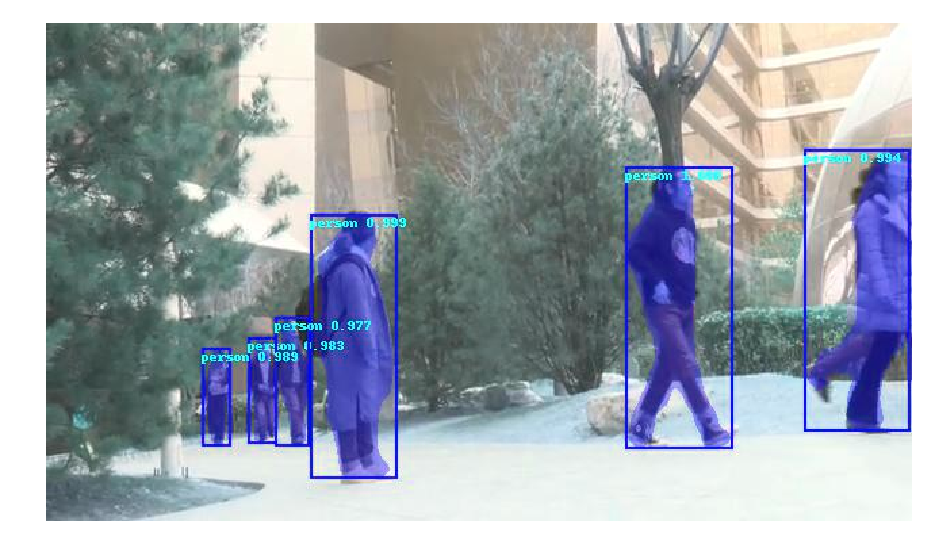

In [17]:
!rm ./video/saver/out.mp4
!rm ./video/saver/out.avi

import cv2
import glob

VIDEO_DIR="{root}/".format(root="/home/aistudio/")
Project_base=RCNN
SAVER=os.path.join(Project_base, "video/saver")
print(SAVER)

labeled_images = list(glob.iglob(os.path.join(SAVER, "*.jpg")))
labeled_images = sorted(labeled_images, key=lambda x: int(os.path.split(x)[1].split('.')[0]))
figsize = (16, 16)
_, ax = plt.subplots(1, figsize=figsize)
im = cv2.imread(labeled_images[200])
height, width = im.shape[:2]
size=(width, height)
ax.set_ylim(height + 10, -10)
ax.set_xlim(-10, width + 10)
ax.axis('off')
ax.imshow(im.astype(np.uint8))

In [19]:
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize

fourcc = VideoWriter_fourcc(*'MJPG')
outputfn = os.path.join(SAVER, "out.avi")
fps = 24 # reset manually

vw = VideoWriter(outputfn, fourcc, float(fps), size)

print("the size of images is : {}".format(size))

for im in labeled_images:
  im = cv2.imread(im)
  height, width, channel = im.shape
  assert channel == 3
  if size[0] != im.shape[1] or size[1] != im.shape[0]:
    im = resize(im, size)
  vw.write(im.astype(np.uint8))

cv2.destroyAllWindows()
vw.release()
print(vw)

!cp $SAVER/out.avi $ROOT/tmp

the size of images is : (640, 368)
<VideoWriter 0x7f408813f830>


In [19]:
# list variables in paddle program
# relevant: 
# - list variables in tensorflow graph: https://stackoverflow.com/questions/39007396/how-do-you-list-the-variables-in-the-graph-in-tensorflow
print(model.get_layers())

In [6]:
!conda install numba -y
!pip install numba

In [7]:
# reset gpu memory 
from numba import cuda



## Prepare ResNet101 pretrained model from coco2017 dataset

In [40]:
import sys

sys.path.insert(0, "%s/Github/MaskRCNN" % ROOT)

In [17]:
# install keras ResNet101 based MaskRCNN model dependencies
# !conda install "keras>=2.0.8" -y
# !conda install "tensorflow>=1.3.0" -y
# !pip install "keras>=2.0.8"
!pip install "tensorflow>=1.3.0"

In [15]:
# Load variables: https://github.com/PaddlePaddle/Paddle/blob/develop/python/paddle/fluid/io.py#L512
# Load parameters: https://github.com/PaddlePaddle/models/tree/develop/PaddleCV/caffe2fluid
# parse keras model data: https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/model.py
import keras
try:
    from keras.engine import saving
except ImportError:
    # Keras before 2.2 used the 'topology' namespace.
    from keras.engine import topology as saving


def prepare_resnet50_weights_coco():
    pass

# @todo : TODO
def prepare_resnet101_weights_coco(model_path):
    f = h5py.File(model_path, mode='r')
    if 'layer_names' not in f.attrs and 'model_weights' in f:
        f = f['model_weights']
    print(f)
    

MODEL_PATH_COCO = "/home/aistudio/work/Github/PaddleModels/PaddleCV/" + "imagenet_resnet101_backbone.h5"

prepare_resnet101_weights_coco(MODEL_PATH_COCO)
